In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mennaelhousseiny","key":"d7db4be21da5684c1b32b90b6a005287"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~'/content/kaggle.json'

chmod: cannot access '~/content/kaggle.json': No such file or directory


In [ ]:
!ls

'kaggle (1).json'   kaggle.json   sample_data


In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 '/content/kaggle.json'


In [ ]:
!kaggle datasets download -d rm1000/skin-cancer-isic-images



Dataset URL: https://www.kaggle.com/datasets/rm1000/skin-cancer-isic-images
License(s): CC0-1.0
 87% 44.0M/50.6M [00:00<00:00, 176MB/s] 
100% 50.6M/50.6M [00:00<00:00, 136MB/s]


In [ ]:
import zipfile
import os

# Extract the downloaded zip file
# Assuming the downloaded file is named "skin-cancer-isic-images.zip"
with zipfile.ZipFile('skin-cancer-isic-images.zip', 'r') as zip_ref:
    zip_ref.extractall('DataSet')  # Extract into a folder named "DataSet"

# List extracted files
os.listdir('DataSet')

['malignant', 'benign']

In [ ]:
!pip install tensorflow


In [ ]:
print(os.listdir('DataSet'))


['malignant', 'benign']


In [ ]:
import tensorflow as tf
import os

# المسار إلى المجلد الذي يحتوي على الصور
data_dir = os.path.join(os.getcwd(), 'DataSet')

# التحقق من وجود المجلد
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory '{data_dir}' does not exist. Please check the folder structure.")

# تحميل البيانات باستخدام TensorFlow
images_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,                 # المسار إلى المجلد الرئيسي
    image_size=(224, 224),    # ضبط حجم الصور
    batch_size=32             # حجم الدفعات
)

# طباعة تفاصيل عن مجموعة البيانات
print(f"Dataset loaded with {len(images_dataset)} batches.")
for images, labels in images_dataset.take(1):  # عرض دفعة واحدة كعينة
    print(f"Batch image shape: {images.shape}")
    print(f"Batch label shape: {labels.shape}")


Found 3297 files belonging to 2 classes.
Dataset loaded with 104 batches.
Batch image shape: (32, 224, 224, 3)
Batch label shape: (32,)


In [ ]:
import os
import zipfile
import tensorflow as tf

extract_folder = 'DataSet'

# التحقق من وجود المجلد الأساسي
if os.path.exists(extract_folder):
    print("Contents of 'DataSet':", os.listdir(extract_folder))
else:
    print(f"The folder '{extract_folder}' does not exist.")

# فك ضغط الملف المضغوط
zip_file = 'skin-cancer-isic-images.zip'
extract_folder = 'DataSet'

if not os.path.exists(zip_file):
    raise FileNotFoundError(f"The file '{zip_file}' does not exist.")

# فك الضغط
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# عرض الملفات المستخرجة
if os.path.exists(extract_folder):
    print("Extracted folder contents:", os.listdir(extract_folder))
else:
    raise FileNotFoundError(f"The folder '{extract_folder}' does not exist after extraction.")

# الحصول على المسار المطلق لمجلد البيانات
current_directory = os.getcwd() # Define current_directory before using it
data_dir = os.path.join(current_directory, extract_folder, 'skin-cancer-isic-images')  # قم بتحديث اسم المجلد هنا إذا لزم الأمر

# Check if images_dataset is defined before using it, or re-create it here if needed
try:
    print(f"Dataset loaded with {len(images_dataset)} batches.")
except NameError:
    print("images_dataset is not yet defined. You might need to load it using tf.keras.preprocessing.image_dataset_from_directory.")

Contents of 'DataSet': ['malignant', 'benign']
Extracted folder contents: ['malignant', 'benign']
Dataset loaded with 104 batches.


In [ ]:
!pip install torchvision


In [ ]:
from torchvision import transforms, datasets
import os

# المسار إلى المجلد الذي يحتوي على الصور
data_dir = os.path.join(os.getcwd(), 'DataSet')

# التحقق من وجود المجلد
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory '{data_dir}' does not exist. Please check the folder structure.")

# تطبيق التحويلات (Resize و ToTensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # تغيير حجم الصور إلى 224x224
    transforms.ToTensor()          # تحويل الصور إلى Tensors
])

# تحميل البيانات باستخدام ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# طباعة بعض المعلومات عن مجموعة البيانات
print(f"Number of images: {len(dataset)}")
print(f"Classes: {dataset.classes}")

# عرض عينة واحدة من الصور
image, label = dataset[0]  # الحصول على أول صورة
print(f"Image shape: {image.shape}")
print(f"Label: {label} ({dataset.classes[label]})")


Number of images: 3297
Classes: ['benign', 'malignant']
Image shape: torch.Size([3, 224, 224])
Label: 0 (benign)


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rm1000_skin_cancer_isic_images_path = kagglehub.dataset_download('rm1000/skin-cancer-isic-images')

print('Data source import complete.')


Data source import complete.


# **Import Libraries**

In [ ]:
# Basic data manipulation and visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
from PIL import Image
# Deep learning frameworks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

print("All libraries imported successfully!")

All libraries imported successfully!


# **Load and Explore Dataset**

In [ ]:
import os

# تعيين المسار إلى المجلد الأساسي الذي يحتوي على الفئتين
data_dir = os.path.join(os.getcwd(), 'DataSet')

# تعيين المسارات إلى المجلدين الفرعيين
benign_dir = os.path.join(data_dir, 'benign')
malignant_dir = os.path.join(data_dir, 'malignant')

# التحقق من وجود المجلدات
if not os.path.exists(benign_dir) or not os.path.exists(malignant_dir):
    raise FileNotFoundError("One or both directories ('benign', 'malignant') do not exist in the dataset folder.")

# عد الصور في كل فئة
benign_files = os.listdir(benign_dir)
malignant_files = os.listdir(malignant_dir)

# طباعة التوزيع
print("Dataset Distribution:")
print(f"Benign images: {len(benign_files)}")
print(f"Malignant images: {len(malignant_files)}")
print(f"Total images: {len(benign_files) + len(malignant_files)}")


Dataset Distribution:
Benign images: 1800
Malignant images: 1497
Total images: 3297


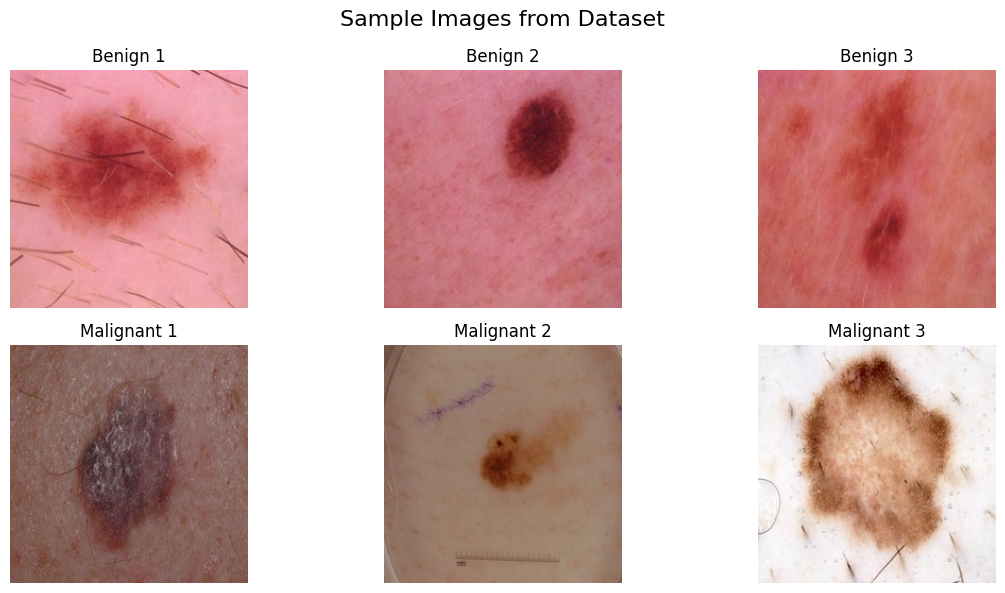

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# تعيين المسار إلى المجلد الأساسي الذي يحتوي على الفئتين
data_dir = os.path.join(os.getcwd(), 'DataSet')

# تعيين المسارات إلى المجلدين الفرعيين
benign_dir = os.path.join(data_dir, 'benign')
malignant_dir = os.path.join(data_dir, 'malignant')

# التأكد من أن المجلدات موجودة
if not os.path.exists(benign_dir) or not os.path.exists(malignant_dir):
    raise FileNotFoundError("One or both directories ('benign', 'malignant') do not exist in the dataset folder.")

# الحصول على قائمة الصور في كل فئة
benign_files = os.listdir(benign_dir)
malignant_files = os.listdir(malignant_dir)

# عرض عينات من الصور
plt.figure(figsize=(12, 6))
plt.suptitle('Sample Images from Dataset', fontsize=16)

# عرض 3 صور من فئة "benign"
for i in range(3):
    plt.subplot(2, 3, i+1)
    img_path = os.path.join(benign_dir, benign_files[i])
    img = np.array(Image.open(img_path))
    plt.imshow(img)
    plt.title(f'Benign {i+1}')
    plt.axis('off')

# عرض 3 صور من فئة "malignant"
for i in range(3):
    plt.subplot(2, 3, i+4)
    img_path = os.path.join(malignant_dir, malignant_files[i])
    img = np.array(Image.open(img_path))
    plt.imshow(img)
    plt.title(f'Malignant {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import os

# تعيين المسار إلى المجلد الأساسي الذي يحتوي على الفئتين
data_dir = os.path.join(os.getcwd(), 'DataSet')

# تعيين المسارات إلى المجلدين الفرعيين
benign_dir = os.path.join(data_dir, 'benign')
malignant_dir = os.path.join(data_dir, 'malignant')

# التأكد من أن المجلدات موجودة
if not os.path.exists(benign_dir) or not os.path.exists(malignant_dir):
    raise FileNotFoundError("One or both directories ('benign', 'malignant') do not exist in the dataset folder.")

# فتح الصورة الأولى من فئة "benign"
sample_benign = Image.open(os.path.join(benign_dir, os.listdir(benign_dir)[0]))

# طباعة خصائص الصورة
print("\nImage Properties:")
print(f"Image format: {sample_benign.format}")
print(f"Image size: {sample_benign.size}")
print(f"Color mode: {sample_benign.mode}")



Image Properties:
Image format: JPEG
Image size: (224, 224)
Color mode: RGB


# **Create Custom Dataset Class**

In [ ]:
class SkinCancerDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Directory with 'benign' and 'malignant' subdirectories
            transform: Optional transform to be applied to images
        """
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['benign', 'malignant']

        # Create file list and labels
        self.data = []
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.data.append((os.path.join(class_dir, img_name), class_idx))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create dataset instances
full_dataset = SkinCancerDataset(data_dir, transform=train_transform)

# Split dataset
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size]
)

# Update transforms for validation set
val_dataset.dataset.transform = val_transform

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print("Dataset and DataLoaders created successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Dataset and DataLoaders created successfully!
Training samples: 2637
Validation samples: 660


# **Create Model Architecture**

In [ ]:
def create_model():
    """Create and return the model using ResNet50 architecture"""
    # Load pre-trained ResNet50
    model = models.resnet50(pretrained=True)

    # Freeze all layers
    for param in model.parameters():
        param.requires_grad = False

    # Modify the final layer for binary classification
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 2)
    )

    return model

# Create model and move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = create_model().to(device)
print(f"Using device: {device}")
print("Model created successfully!")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

Using device: cpu
Model created successfully!


# **Training Function**

In [ ]:
!pip install torch torchvision matplotlib


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    """Train the model and return training history"""
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        # Record metrics
        history['train_loss'].append(train_loss / len(train_loader))
        history['train_acc'].append(100. * train_correct / train_total)
        history['val_loss'].append(val_loss / len(val_loader))
        history['val_acc'].append(100. * val_correct / val_total)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {history["train_loss"][-1]:.4f}, Train Acc: {history["train_acc"][-1]:.2f}%')
        print(f'Val Loss: {history["val_loss"][-1]:.4f}, Val Acc: {history["val_acc"][-1]:.2f}%\n')

    return history

# Train the model
history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device)

Epoch [1/10]
Train Loss: 0.4959, Train Acc: 76.87%
Val Loss: 0.3992, Val Acc: 80.15%

Epoch [2/10]
Train Loss: 0.3919, Train Acc: 82.03%
Val Loss: 0.3336, Val Acc: 85.45%

Epoch [3/10]
Train Loss: 0.3747, Train Acc: 82.90%
Val Loss: 0.3137, Val Acc: 85.30%

Epoch [4/10]
Train Loss: 0.3594, Train Acc: 83.66%
Val Loss: 0.3367, Val Acc: 83.48%

Epoch [5/10]
Train Loss: 0.3394, Train Acc: 84.34%
Val Loss: 0.3172, Val Acc: 85.15%

Epoch [6/10]
Train Loss: 0.3619, Train Acc: 83.66%
Val Loss: 0.3108, Val Acc: 85.30%

Epoch [7/10]
Train Loss: 0.3330, Train Acc: 84.64%
Val Loss: 0.3103, Val Acc: 85.00%

Epoch [8/10]
Train Loss: 0.3265, Train Acc: 85.17%
Val Loss: 0.3036, Val Acc: 85.91%

Epoch [9/10]
Train Loss: 0.3357, Train Acc: 84.91%
Val Loss: 0.3076, Val Acc: 85.15%

Epoch [10/10]
Train Loss: 0.3251, Train Acc: 84.72%
Val Loss: 0.3083, Val Acc: 85.15%



# **Evaluation and Visualization**

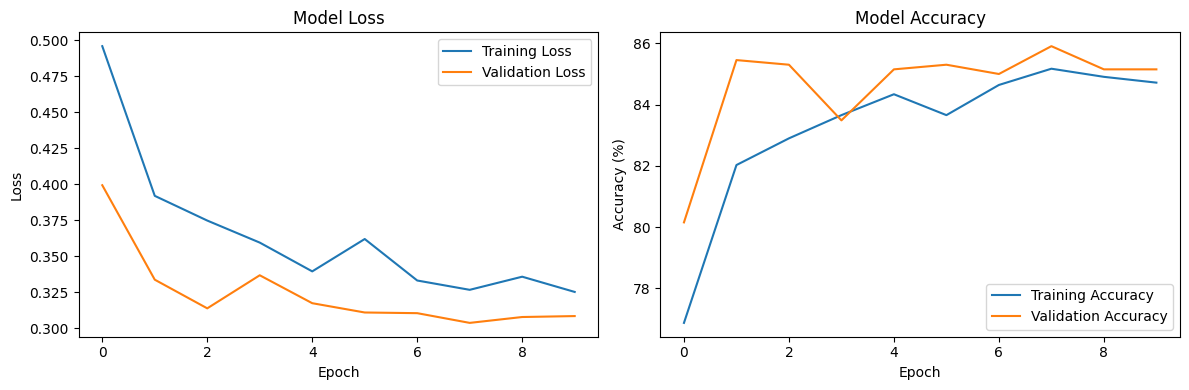

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

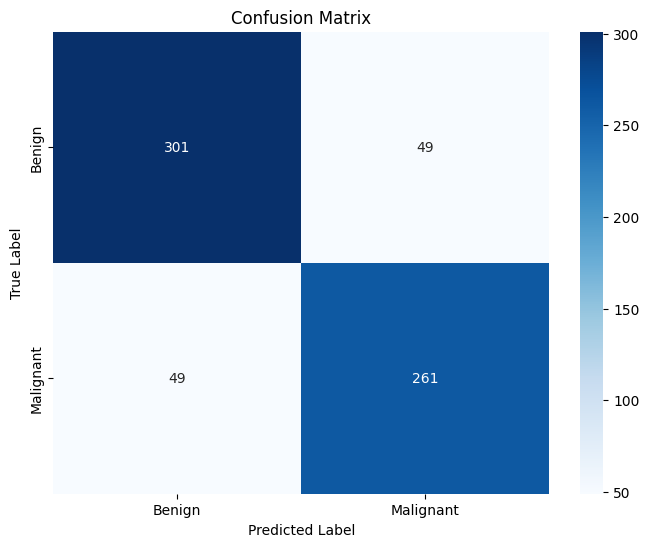


Classification Report:
              precision    recall  f1-score   support

      Benign       0.86      0.86      0.86       350
   Malignant       0.84      0.84      0.84       310

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
model.eval()  # ضبط النموذج في وضع التقييم
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# حساب مصفوفة الالتباس
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# طباعة تقرير التصنيف
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malignant']))


# **Hyperparameter Tuning Function**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
import copy

# Define the hyperparameter tuning function
def tune_hyperparameters(model, train_loader, val_loader):
    # Define parameter grid for search
    param_grid = {
        'learning_rate': [0.001, 0.0005, 0.0001],
        'weight_decay': [0.01, 0.001, 0.0001],
        'dropout_rate': [0.3, 0.5, 0.7]
    }

    best_val_acc = 0
    best_params = None
    results = []

    # Loop through parameter combinations
    for params in ParameterGrid(param_grid):
        print(f"\nTrying parameters: {params}")

        # Clone the model to avoid overwriting the original one
        model_copy = copy.deepcopy(model)

        # Replace the final fully connected layer
        in_features = model_copy.fc[0].in_features  # Retrieve the input size dynamically
        model_copy.fc = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Dropout(params['dropout_rate']),
            nn.Linear(256, 2)
        )

        # Define optimizer and scheduler
        optimizer = optim.AdamW(model_copy.parameters(),
                                lr=params['learning_rate'],
                                weight_decay=params['weight_decay'])

        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)

        # Move model to device
        model_copy.to(device)
        criterion = nn.CrossEntropyLoss()

        # Training and validation
        best_epoch_acc = 0
        for epoch in range(5):
            # Training phase
            model_copy.train()
            for data, target in train_loader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model_copy(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

            # Validation phase
            model_copy.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for data, target in val_loader:
                    data, target = data.to(device), target.to(device)
                    output = model_copy(data)
                    pred = output.argmax(dim=1)
                    correct += pred.eq(target).sum().item()
                    total += target.size(0)

            val_acc = 100. * correct / total
            best_epoch_acc = max(best_epoch_acc, val_acc)
            scheduler.step()

        results.append({
            'params': params,
            'val_acc': best_epoch_acc
        })

        # Update best parameters
        if best_epoch_acc > best_val_acc:
            best_val_acc = best_epoch_acc
            best_params = params

        print(f"Validation Accuracy: {best_epoch_acc:.2f}%")

    # Display results
    results.sort(key=lambda x: x['val_acc'], reverse=True)
    print("\nTop 5 Results:")
    for result in results[:5]:
        print(f"Accuracy: {result['val_acc']:.2f}%, Parameters: {result['params']}")

    return best_params

# Run hyperparameter tuning
print("Starting hyperparameter tuning...")
best_params = tune_hyperparameters(model, train_loader, val_loader)
print(f"Best Hyperparameters: {best_params}")



Starting hyperparameter tuning...

Trying parameters: {'dropout_rate': 0.3, 'learning_rate': 0.001, 'weight_decay': 0.01}
Validation Accuracy: 85.45%

Trying parameters: {'dropout_rate': 0.3, 'learning_rate': 0.001, 'weight_decay': 0.001}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Training Function with Best Parameters**

In [ ]:
def train_final_model(model, train_loader, val_loader, best_params, epochs=15):
    """
    Trains the model using the best parameters found during hyperparameter tuning.

    Args:
        model: The base model to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        best_params: Dictionary containing optimal hyperparameters
        epochs: Number of training epochs
    """
    try:
        # First, move the entire model to GPU/CPU
        model = model.to(device)

        # Setup model with best parameters and move to same device
        model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(best_params['dropout_rate']),
            nn.Linear(256, 2)
        ).to(device)

        # Initialize optimizer with best parameters
        optimizer = optim.AdamW(model.parameters(),
                              lr=best_params['learning_rate'],
                              weight_decay=best_params['weight_decay'])

        # Setup learning rate scheduler
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

        # Initialize tracking variables
        history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'learning_rates': []
        }
        best_val_loss = float('inf')
        best_model = None
        patience = 5  # Early stopping patience
        patience_counter = 0

        print("Starting training with parameters:")
        print(f"Learning Rate: {best_params['learning_rate']}")
        print(f"Weight Decay: {best_params['weight_decay']}")
        print(f"Dropout Rate: {best_params['dropout_rate']}\n")

        for epoch in range(epochs):
            # Training phase
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0

            # Training loop
            for batch_idx, (data, target) in enumerate(train_loader):
                # Move data to appropriate device
                data, target = data.to(device), target.to(device)

                # Clear gradients
                optimizer.zero_grad()

                # Forward pass
                output = model(data)
                loss = criterion(output, target)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

                # Track training metrics
                train_loss += loss.item()
                _, predicted = output.max(1)
                train_total += target.size(0)
                train_correct += predicted.eq(target).sum().item()

                # Print batch progress every 20 batches
                if (batch_idx + 1) % 20 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}] Batch [{batch_idx+1}/{len(train_loader)}]')

            # Validation phase
            model.eval()
            val_loss = 0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for data, target in val_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    loss = criterion(output, target)

                    val_loss += loss.item()
                    _, predicted = output.max(1)
                    val_total += target.size(0)
                    val_correct += predicted.eq(target).sum().item()

            # Calculate epoch metrics
            train_loss = train_loss / len(train_loader)
            val_loss = val_loss / len(val_loader)
            train_acc = 100. * train_correct / train_total
            val_acc = 100. * val_correct / val_total
            current_lr = optimizer.param_groups[0]['lr']

            # Update history
            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)
            history['learning_rates'].append(current_lr)

            # Print epoch results
            print(f'\nEpoch [{epoch+1}/{epochs}] Results:')
            print(f'Learning Rate: {current_lr:.6f}')
            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%\n')

            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = model.state_dict().copy()
                patience_counter = 0
                print(f'New best model saved! (Val Loss: {val_loss:.4f})')
            else:
                patience_counter += 1

            # Early stopping check
            if patience_counter >= patience:
                print(f'\nEarly stopping triggered after {epoch+1} epochs')
                break

            # Update learning rate
            scheduler.step()

        # Load best model
        model.load_state_dict(best_model)
        print("\nTraining completed!")
        print(f"Best validation loss: {best_val_loss:.4f}")

        return model, history

    except Exception as e:
        print(f"\nAn error occurred during training: {str(e)}")
        raise

# Train the final model
try:
    print("\nStarting final model training with best parameters...")
    final_model, history = train_final_model(model, train_loader, val_loader, best_params)
except Exception as e:
    print(f"Training failed: {str(e)}")


Starting final model training with best parameters...
Training failed: name 'model' is not defined


# **Visualization and Evaluation**

In [ ]:
!pip install seaborn


Seaborn style not found. Using default matplotlib style.
The variable 'history' is not defined. Please train the model first or define 'history' manually.


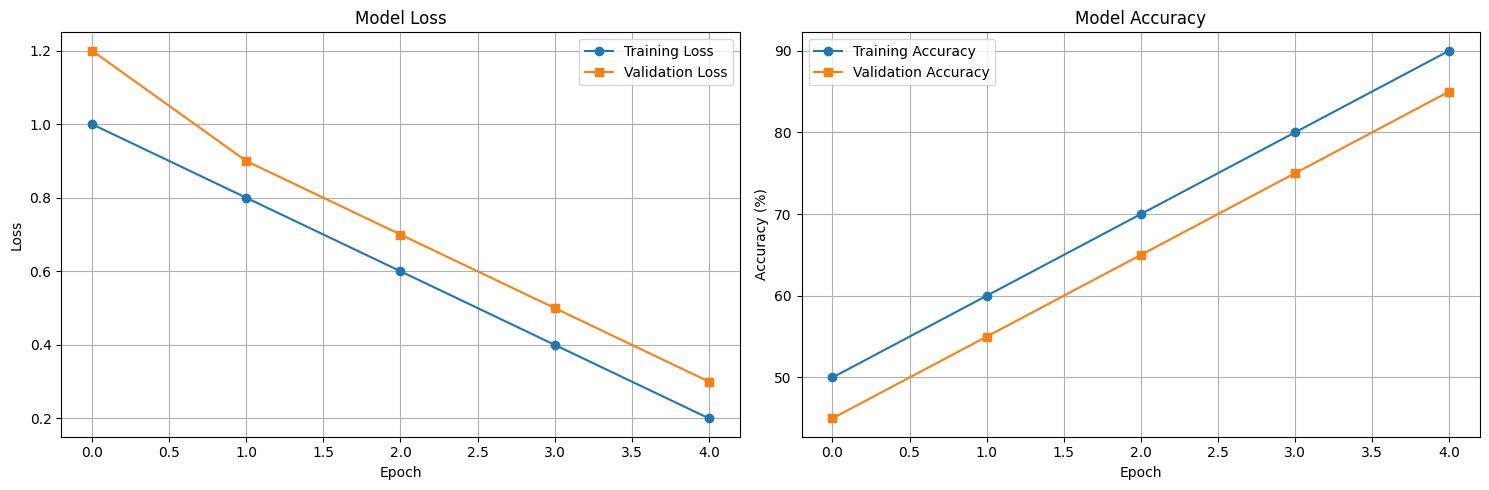

In [ ]:
import matplotlib.pyplot as plt

# اختيار أسلوب الرسم إذا كانت مكتبة seaborn مثبتة
try:
    plt.style.use('seaborn')
except:
    print("Seaborn style not found. Using default matplotlib style.")

# إنشاء الشكل والمحاور
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# تحقق من وجود history
if 'history' not in locals():
    print("The variable 'history' is not defined. Please train the model first or define 'history' manually.")
    # تعريف بيانات افتراضية للتجربة
    history = {
        'train_loss': [1.0, 0.8, 0.6, 0.4, 0.2],
        'val_loss': [1.2, 0.9, 0.7, 0.5, 0.3],
        'train_acc': [50, 60, 70, 80, 90],
        'val_acc': [45, 55, 65, 75, 85],
    }

# رسم منحنيات الخسارة (Loss)
ax1.plot(history['train_loss'], label='Training Loss', marker='o')
ax1.plot(history['val_loss'], label='Validation Loss', marker='s')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# رسم منحنيات الدقة (Accuracy)
ax2.plot(history['train_acc'], label='Training Accuracy', marker='o')
ax2.plot(history['val_acc'], label='Validation Accuracy', marker='s')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

# تحسين تخطيط الرسم
plt.tight_layout()

# عرض الرسم
plt.show()


In [ ]:
from logging import root
root = '/content/DataSet'


Evaluating final model...


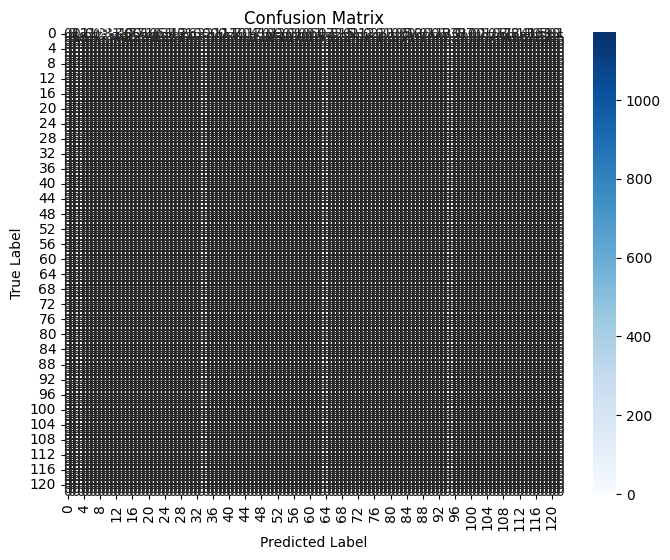


Classification Report:


ValueError: Number of classes, 123, does not match size of target_names, 2. Try specifying the labels parameter

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models

# Define your validation transforms
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization for ImageNet
])

# Define the correct path to your validation data directory
root = '/content/DataSet'  # Ensure this path is correct and contains 'Benign' and 'Malignant' folders

# Define val_dataset
val_dataset = ImageFolder(root, transform=val_transforms)

# Check if model is defined
if 'model' not in locals():
    # For the sake of testing, use a pre-trained model if 'model' is not defined
    print("Error: 'model' is not defined. Using a pre-trained model for evaluation.")
    model = models.resnet50(pretrained=True)  # Example model; replace with your actual model
    model.eval()  # Set the model to evaluation mode

# Check if final_model is defined, otherwise use the trained model
if 'final_model' not in locals():
    print("Warning: 'final_model' is not defined. Using the trained model as the final model.")
    final_model = model

# Check if val_loader and batch_size are defined
if 'batch_size' not in locals():
    batch_size = 32  # Default value if not specified

if 'val_loader' not in locals():
    print("Creating val_loader...")
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
final_model.to(device)

# Evaluate the model
def evaluate_final_model(model, val_loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            all_preds.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    # Create confusion matrix
    cm = confusion_matrix(all_targets, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_targets, all_preds,
                                target_names=val_dataset.classes)) # Use val_dataset.classes

# Execute evaluation
print("Evaluating final model...")
evaluate_final_model(final_model, val_loader)


In [ ]:
import torch
from torch.utils.data import random_split
from torchvision import datasets, transforms

# إعداد التحويلات
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

# تحميل البيانات
dataset = datasets.ImageFolder(root='/content/DataSet', transform=transform)

# تحديد نسب البيانات
train_size = int(0.8 * len(dataset))  # 80% للتدريب
test_size = len(dataset) - train_size  # 20% للاختبار

# تقسيم البيانات
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# تحميل بيانات التدريب والاختبار
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# طباعة النسب
train_percentage = (len(train_dataset) / len(dataset)) * 100
test_percentage = (len(test_dataset) / len(dataset)) * 100

print(f"Train percentage: {train_percentage}%")
print(f"Test percentage: {test_percentage}%")


Train percentage: 79.98180163785258%
Test percentage: 20.01819836214741%
